In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [73]:
# Loading the dataset
data = pd.read_csv('tips (data for regression problem).csv')

In [74]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [75]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [77]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [78]:
data.duplicated().sum()

1

In [79]:
duplicates = data[data.duplicated(keep=False)]
print(duplicates)
data.drop_duplicates(inplace= True)

     total_bill  tip     sex smoker   day   time  size
198        13.0  2.0  Female    Yes  Thur  Lunch     2
202        13.0  2.0  Female    Yes  Thur  Lunch     2


In [80]:
label_encoders = {}
for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
print("Encoded Data:\n")
data.head()

Encoded Data:



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [81]:
# Setting a light pink background color
sns.set(style="whitegrid", rc={"axes.facecolor": "#ffe6e6", "grid.color": "#ffd1d1"})

<Figure size 1000x800 with 0 Axes>

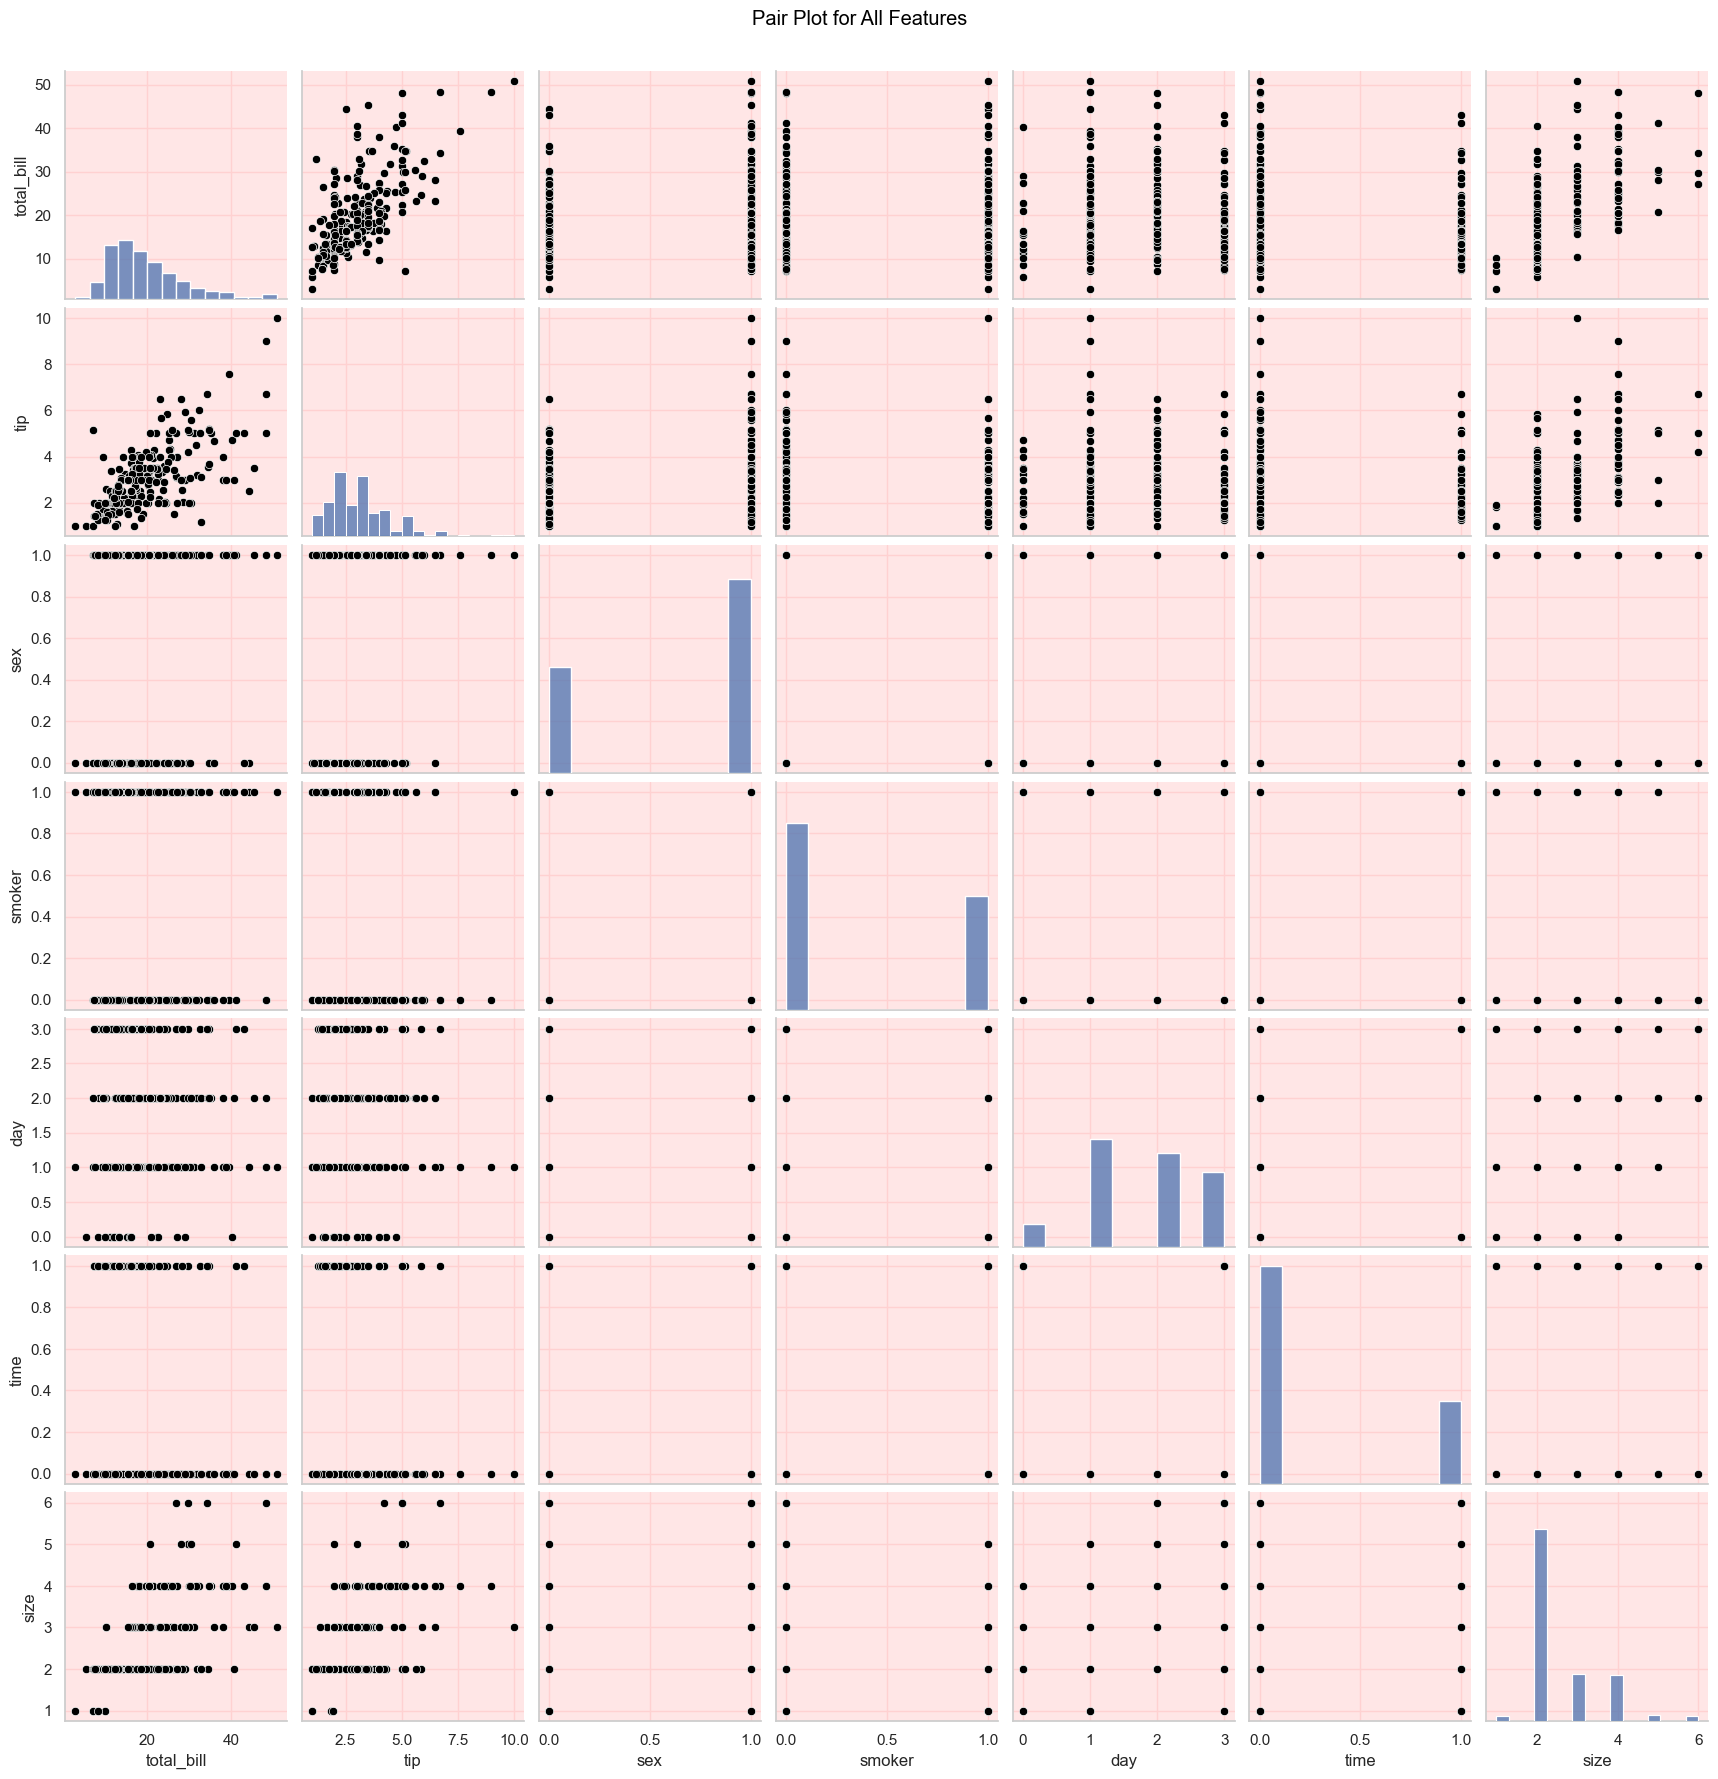

In [82]:
# pair plot 
plt.figure(figsize=(10, 8))
g = sns.pairplot(data, plot_kws={'color': 'black'})  
plt.suptitle('Pair Plot for All Features', y=1.02, color="black")  
plt.show()


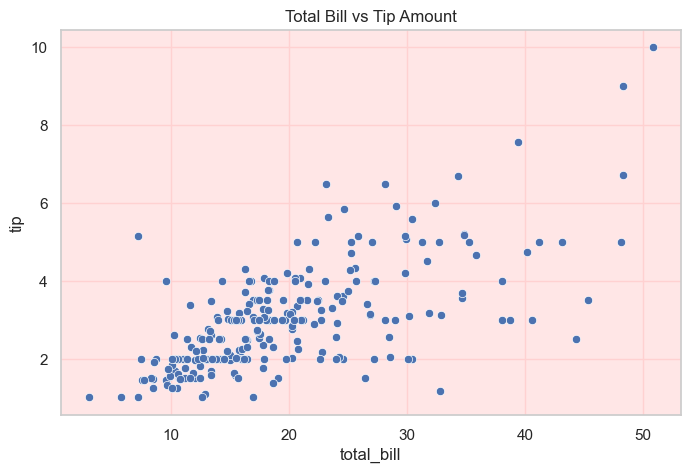

In [83]:
# Scatter plot 
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title('Total Bill vs Tip Amount')
plt.show()

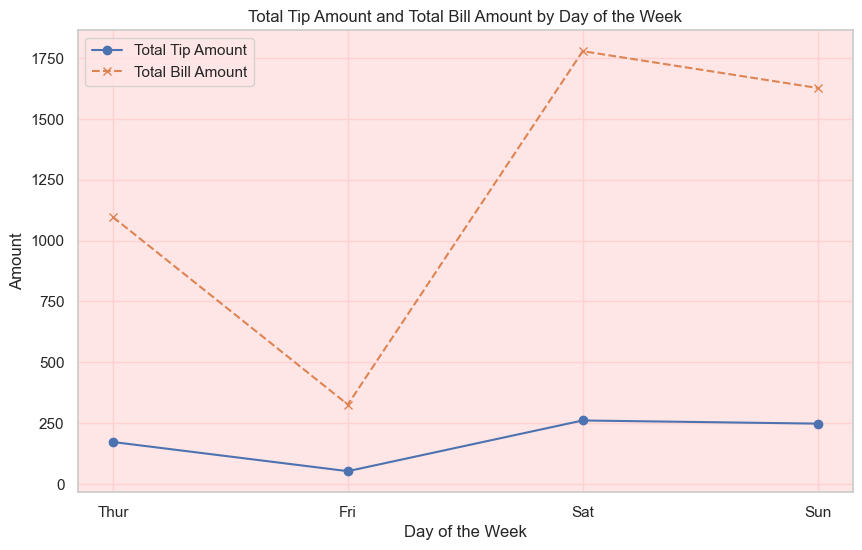

In [84]:
# Line plot
df= pd.read_csv('tips (data for regression problem).csv')
df['day_numeric'] = df['day'].map({'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thur': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7})  
df_sorted = df.sort_values(by='day_numeric')

# Summing total bill and tip amounts by day
df_grouped = df_sorted.groupby('day_numeric').agg({'total_bill': 'sum', 'tip': 'sum'}).reset_index()

df_grouped = df_grouped[df_grouped['total_bill'] > 0]

df_grouped

plt.figure(figsize=(10, 6))
plt.plot(df_grouped['day_numeric'], df_grouped['tip'], marker='o', linestyle='-', label='Total Tip Amount')
plt.plot(df_grouped['day_numeric'], df_grouped['total_bill'], marker='x', linestyle='--', label='Total Bill Amount')

day_labels = ['Thur', 'Fri', 'Sat', 'Sun']
plt.xticks(df_grouped['day_numeric'], day_labels[:len(df_grouped)]) 

plt.xlabel('Day of the Week')
plt.ylabel('Amount')
plt.title('Total Tip Amount and Total Bill Amount by Day of the Week')
plt.legend()
plt.show()


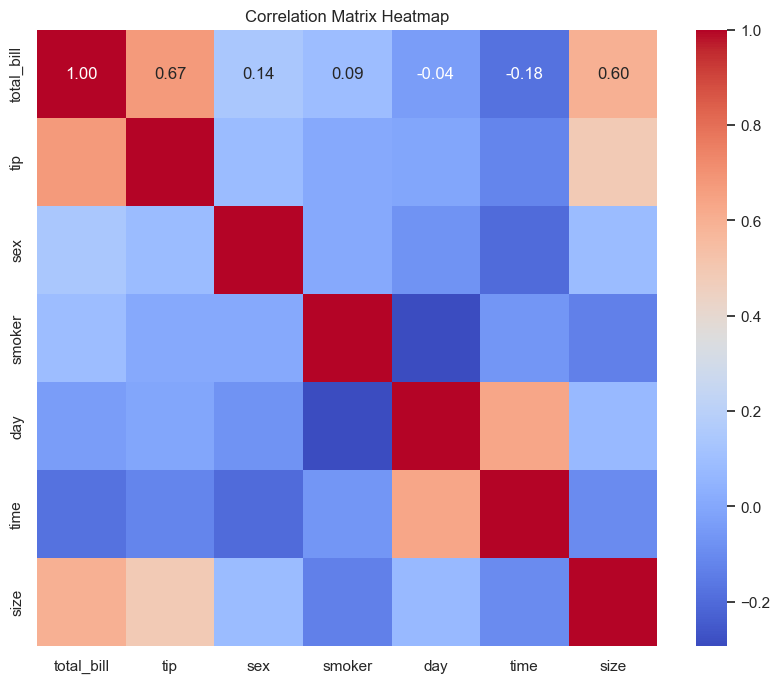

In [85]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [86]:
# Rainbow Test for Linearity
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = data['total_bill']  
y = data['tip']         
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}")
print(f"Rainbow Test p-value: {rainbow_p_value}")

Rainbow Test Statistic: 1.3148004591106655
Rainbow Test p-value: 0.06745745436378922


In [87]:
X = df[['total_bill', 'size']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [88]:
#linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Linear Regression Metrics:
Mean Squared Error (MSE): 0.65
Root Mean Squared Error (RMSE): 0.81
Mean Absolute Error (MAE): 0.66
R-squared (R2): 0.48


In [89]:
#Ridge and Lasso Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print(f"MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, MAE: {mae_ridge:.2f}, R2: {r2_ridge:.2f}")

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print(f"MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, MAE: {mae_lasso:.2f}, R2: {r2_lasso:.2f}")


Ridge Regression Metrics:
MSE: 0.65, RMSE: 0.81, MAE: 0.66, R2: 0.48

Lasso Regression Metrics:
MSE: 0.64, RMSE: 0.80, MAE: 0.66, R2: 0.49


In [90]:
# Elastic net regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.9)
elastic_reg.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_reg.predict(X_test_scaled)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\nElastic Net Metrics:")
print(f"MSE: {mse_elastic:.2f}, RMSE: {rmse_elastic:.2f}, MAE: {mae_elastic:.2f}, R2: {r2_elastic:.2f}")


Elastic Net Metrics:
MSE: 0.62, RMSE: 0.78, MAE: 0.66, R2: 0.51


In [91]:
# Support Vector Regression(SVR)
from sklearn.svm import SVR

svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train_scaled, y_train)
y_pred_svr = svr_reg.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression (SVR) Metrics:")
print(f"MSE: {mse_svr:.2f}, RMSE: {rmse_svr:.2f}, MAE: {mae_svr:.2f}, R2: {r2_svr:.2f}")


Support Vector Regression (SVR) Metrics:
MSE: 0.69, RMSE: 0.83, MAE: 0.67, R2: 0.45


In [92]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Metrics:")
print(f"MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest Regression Metrics:
MSE: 0.83, RMSE: 0.91, MAE: 0.74, R2: 0.33


In [93]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regression Metrics:")
print(f"MSE: {mse_tree:.2f}, RMSE: {rmse_tree:.2f}, MAE: {mae_tree:.2f}, R2: {r2_tree:.2f}")



Decision Tree Regression Metrics:
MSE: 1.00, RMSE: 1.00, MAE: 0.82, R2: 0.20


In [94]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nKNN Regression Metrics:")
print(f"MSE: {mse_knn:.2f}, RMSE: {rmse_knn:.2f}, MAE: {mae_knn:.2f}, R2: {r2_knn:.2f}")



KNN Regression Metrics:
MSE: 0.67, RMSE: 0.82, MAE: 0.68, R2: 0.47


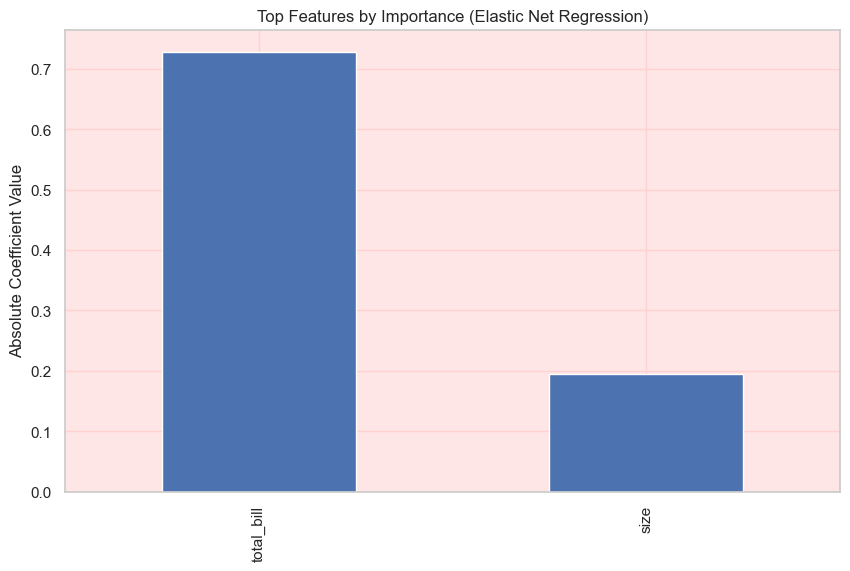


Feature Importance (Coefficients):
total_bill    0.728484
size          0.194366
dtype: float64


In [95]:
# Checking coefficients for feature importance
feature_importance = pd.Series(elastic_reg.coef_, index=X_train.columns)
sorted_importance = feature_importance.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importance.head(10).plot(kind='bar')
plt.title('Top Features by Importance (Elastic Net Regression)')
plt.ylabel('Absolute Coefficient Value')
plt.show()

print("\nFeature Importance (Coefficients):")
print(sorted_importance)

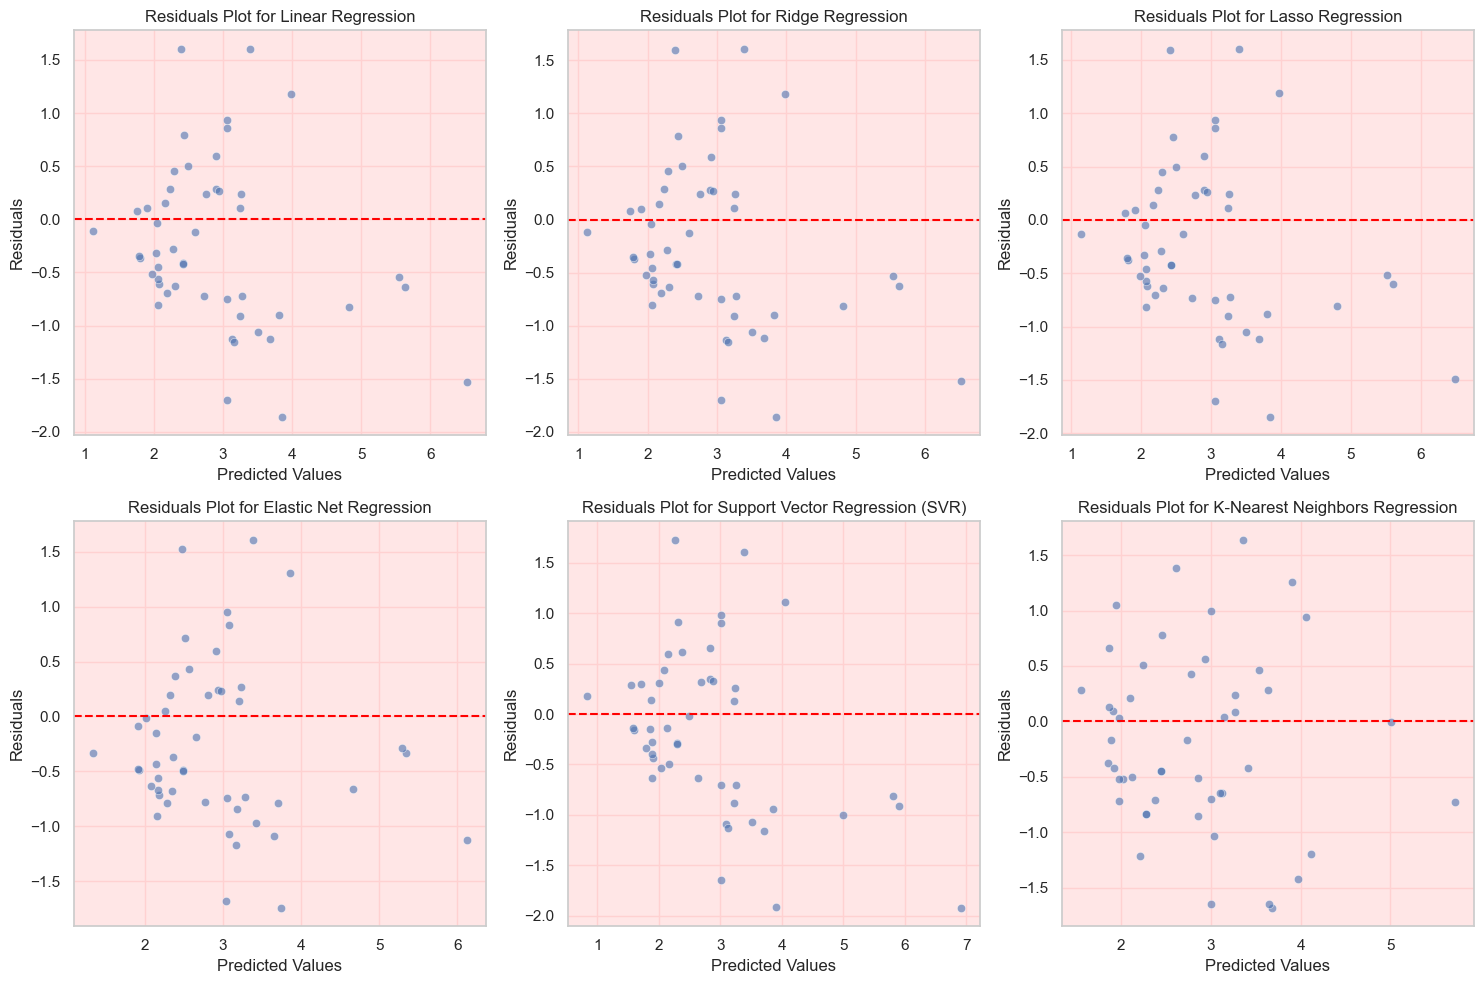

In [96]:
def plot_residuals_subplot(ax, y_test, y_pred, model_name):
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals")
    ax.set_title(f"Residuals Plot for {model_name}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.flatten()  

# Linear Regression
y_pred_lr = lin_reg.predict(X_test_scaled) 
plot_residuals_subplot(axes[0], y_test, y_pred_lr, "Linear Regression")

# Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test_scaled)  
plot_residuals_subplot(axes[1], y_test, y_pred_ridge, "Ridge Regression")

# Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test_scaled)
plot_residuals_subplot(axes[2], y_test, y_pred_lasso, "Lasso Regression")

# Elastic Net Regression
y_pred_elastic = elastic_reg.predict(X_test_scaled)
plot_residuals_subplot(axes[3], y_test, y_pred_elastic, "Elastic Net Regression")

# Support Vector Regression
y_pred_svr = svr_reg.predict(X_test_scaled)  
plot_residuals_subplot(axes[4], y_test, y_pred_svr, "Support Vector Regression (SVR)")

# K-Nearest Neighbors Regression
y_pred_knn = knn_reg.predict(X_test_scaled)  
plot_residuals_subplot(axes[5], y_test, y_pred_knn, "K-Nearest Neighbors Regression")

plt.tight_layout()
plt.show()


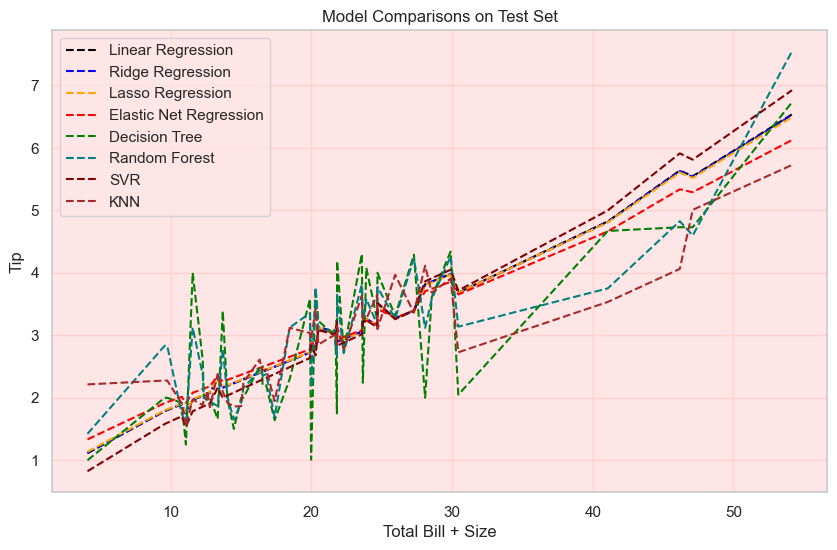

In [97]:
sorted_indices = np.argsort(X_test[['total_bill', 'size']].sum(axis=1)) 
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_lr[sorted_indices], color='black', label='Linear Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_ridge[sorted_indices], color='blue', label='Ridge Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_lasso[sorted_indices], color='orange', label='Lasso Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_elastic[sorted_indices], color='red', label='Elastic Net Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_tree[sorted_indices], color='green', label='Decision Tree', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_rf[sorted_indices], color='teal', label='Random Forest', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_svr[sorted_indices], color='maroon', label='SVR', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_knn[sorted_indices], color='brown', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('Total Bill + Size')
plt.ylabel('Tip')
plt.legend()
plt.show()